In [1]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define the path of the main folder
main_folder_path = '/content/drive/MyDrive/pizza_not_pizza'

# Define the path of the train and test folders
train_folder_path = '/content/drive/MyDrive/pizza_not_pizza/train'
test_folder_path = '/content/drive/MyDrive/pizza_not_pizza/test'

# Create the train and test folders if they don't exist
if not os.path.exists(train_folder_path):
    os.makedirs(train_folder_path)
if not os.path.exists(test_folder_path):
    os.makedirs(test_folder_path)

# Define the paths of the subfolders
pizza_folder_path = os.path.join(main_folder_path, 'pizza')
not_pizza_folder_path = os.path.join(main_folder_path, 'not_pizza')

# Define the paths of the train and test subfolders
train_pizza_folder_path = os.path.join(train_folder_path, 'pizza')
train_not_pizza_folder_path = os.path.join(train_folder_path, 'not_pizza')
test_pizza_folder_path = os.path.join(test_folder_path, 'pizza')
test_not_pizza_folder_path = os.path.join(test_folder_path, 'not_pizza')

# Create the train and test subfolders if they don't exist
if not os.path.exists(train_pizza_folder_path):
    os.makedirs(train_pizza_folder_path)
if not os.path.exists(train_not_pizza_folder_path):
    os.makedirs(train_not_pizza_folder_path)
if not os.path.exists(test_pizza_folder_path):
    os.makedirs(test_pizza_folder_path)
if not os.path.exists(test_not_pizza_folder_path):
    os.makedirs(test_not_pizza_folder_path)

# Split the images into train and test datasets
pizza_images = os.listdir(pizza_folder_path)
not_pizza_images = os.listdir(not_pizza_folder_path)
train_pizza_images, test_pizza_images, train_not_pizza_images, test_not_pizza_images = train_test_split(
    pizza_images, not_pizza_images, test_size=0.2, random_state=42)

# Copy the pizza images to the train and test pizza subfolders
for image in train_pizza_images:
    shutil.copy(os.path.join(pizza_folder_path, image), train_pizza_folder_path)
for image in test_pizza_images:
    shutil.copy(os.path.join(pizza_folder_path, image), test_pizza_folder_path)

# Copy the non-pizza images to the train and test non-pizza subfolders
for image in train_not_pizza_images:
    shutil.copy(os.path.join(not_pizza_folder_path, image), train_not_pizza_folder_path)
for image in test_not_pizza_images:
    shutil.copy(os.path.join(not_pizza_folder_path, image), test_not_pizza_folder_path)


In [2]:
!ls /content/drive/MyDrive/pizza_not_pizza

food101_subset.py  not_pizza  pizza  test  train


In [3]:
!ls /content/drive/MyDrive/pizza_not_pizza/train

not_pizza  pizza


In [4]:
import os

# Path to the folder in your Google Drive
path = "/content/drive/MyDrive/pizza_not_pizza"

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk(path):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 4 directories and 1 images in '/content/drive/MyDrive/pizza_not_pizza'.
There are 0 directories and 983 images in '/content/drive/MyDrive/pizza_not_pizza/pizza'.
There are 0 directories and 983 images in '/content/drive/MyDrive/pizza_not_pizza/not_pizza'.
There are 2 directories and 0 images in '/content/drive/MyDrive/pizza_not_pizza/train'.
There are 0 directories and 935 images in '/content/drive/MyDrive/pizza_not_pizza/train/pizza'.
There are 0 directories and 946 images in '/content/drive/MyDrive/pizza_not_pizza/train/not_pizza'.
There are 2 directories and 0 images in '/content/drive/MyDrive/pizza_not_pizza/test'.
There are 0 directories and 346 images in '/content/drive/MyDrive/pizza_not_pizza/test/pizza'.
There are 0 directories and 357 images in '/content/drive/MyDrive/pizza_not_pizza/test/not_pizza'.


In [5]:
# Another way to find out how many images are in a file
path = "/content/drive/MyDrive/pizza_not_pizza/train/pizza"
path2 = "/content/drive/MyDrive/pizza_not_pizza/train/not_pizza"


num_steak_images_train = len(os.listdir(path2))

num_steak_images_train

946

In [6]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
path = "/content/drive/MyDrive/pizza_not_pizza/train/"

data_dir = pathlib.Path(path) # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['not_pizza' 'pizza']


In [7]:
# Define training and test directory paths
train_dir = "/content/drive/MyDrive/pizza_not_pizza/train/"
test_dir = "/content/drive/MyDrive/pizza_not_pizza/test/"

In [8]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


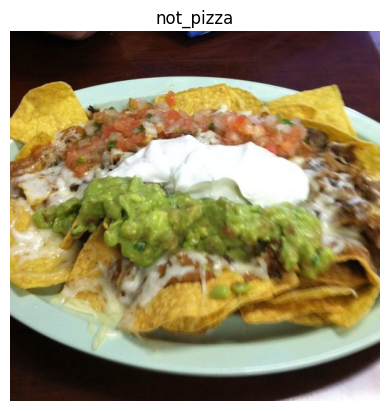

In [9]:
# View a random image from the training dataset
img = view_random_image(target_dir="/content/drive/MyDrive/pizza_not_pizza/train/",
                        target_class="not_pizza")

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


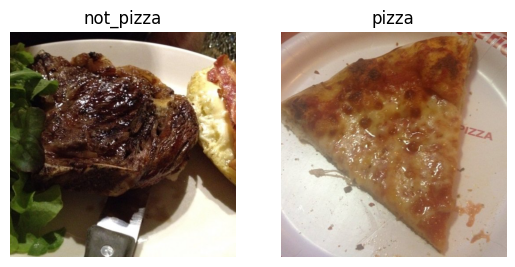

In [10]:
# Visualize data (requires function 'view_random_image' above)
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("/content/drive/MyDrive/pizza_not_pizza/train/", "not_pizza")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("/content/drive/MyDrive/pizza_not_pizza/train/", "pizza")

In [11]:
# View the image shape
img.shape # returns (width, height, colour channels)

(512, 512, 3)

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [14]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True,
                                             fill_mode='nearest') # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [15]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=True) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=True) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1881 images belonging to 2 classes.
Non-augmented training images:
Found 1881 images belonging to 2 classes.
Unchanged test images:
Found 703 images belonging to 2 classes.


In [16]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented, they stay the same

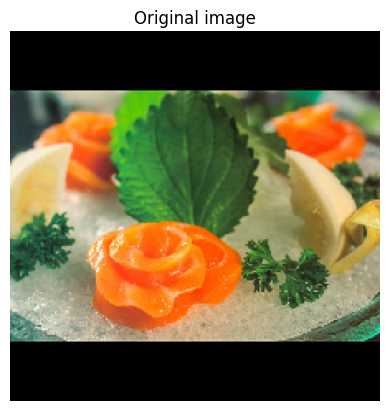

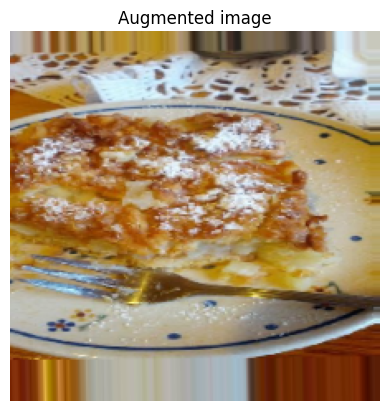

In [17]:
# Show original image and augmented image
random_number = random.randint(0, 32) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [19]:
train_data_augmented[0]


(array([[[[0.5372549 , 0.30588236, 0.17254902],
          [0.5372549 , 0.30588236, 0.17254902],
          [0.5372549 , 0.30588236, 0.17254902],
          ...,
          [0.7822433 , 0.5979296 , 0.3155766 ],
          [0.78046453, 0.59422624, 0.30802405],
          [0.77647066, 0.5882353 , 0.29803923]],
 
         [[0.5372549 , 0.30588236, 0.17254902],
          [0.5372549 , 0.30588236, 0.17254902],
          [0.5372549 , 0.30588236, 0.17254902],
          ...,
          [0.78264   , 0.5983262 , 0.3159733 ],
          [0.77967113, 0.5930362 , 0.30604059],
          [0.77647066, 0.5882353 , 0.29803923]],
 
         [[0.5372549 , 0.30588236, 0.17254902],
          [0.5372549 , 0.30588236, 0.17254902],
          [0.5372549 , 0.30588236, 0.17254902],
          ...,
          [0.7830367 , 0.59872293, 0.31637   ],
          [0.7788778 , 0.59184605, 0.30405712],
          [0.77647066, 0.5882353 , 0.29803923]],
 
         ...,
 
         [[0.22644325, 0.13675104, 0.05696864],
          [0.23346

In [21]:
from tensorflow.keras.optimizers import Adam

# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 26, 26, 128)     

In [26]:

# Train the model
history = model.fit(
    train_data_augmented,
    steps_per_epoch=len(train_data_augmented),
    epochs=20,
    validation_data=test_data,
    validation_steps=len(test_data))

Epoch 1/20
59/59 [==============================] - 36s 611ms/step - loss: 0.5452 - accuracy: 0.7278 - val_loss: 0.4734 - val_accuracy: 0.7596
Epoch 2/20
59/59 [==============================] - 35s 588ms/step - loss: 0.5080 - accuracy: 0.7570 - val_loss: 0.4675 - val_accuracy: 0.7724
Epoch 3/20
59/59 [==============================] - 35s 598ms/step - loss: 0.4894 - accuracy: 0.7719 - val_loss: 0.4526 - val_accuracy: 0.7795
Epoch 4/20
59/59 [==============================] - 35s 588ms/step - loss: 0.5035 - accuracy: 0.7597 - val_loss: 0.4453 - val_accuracy: 0.7881
Epoch 5/20
59/59 [==============================] - 36s 606ms/step - loss: 0.4653 - accuracy: 0.7794 - val_loss: 0.4061 - val_accuracy: 0.8193
Epoch 6/20
59/59 [==============================] - 36s 607ms/step - loss: 0.4585 - accuracy: 0.7895 - val_loss: 0.3913 - val_accuracy: 0.8265
Epoch 7/20
59/59 [==============================] - 36s 616ms/step - loss: 0.4263 - accuracy: 0.8081 - val_loss: 0.4277 - val_accuracy: 0.8151

In [27]:
# Save the model
model.save('pizza_classifier.h5')

In [28]:
# Download another test image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg 


--2023-04-03 09:56:32--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.01s   

2023-04-03 09:56:32 (220 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



--2023-04-03 10:01:53--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.01s   

2023-04-03 10:01:54 (197 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



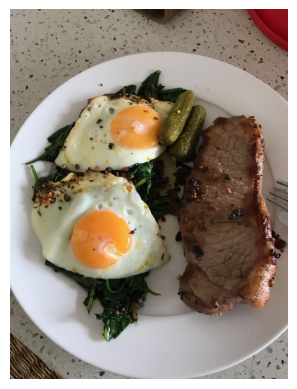

In [34]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [37]:
from tensorflow.keras.preprocessing import image
# Make a prediction on a single image
img_path = '/content/03-steak.jpeg'
img = image.load_img(img_path, target_size=(224, 224))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

prediction = model.predict(img_tensor)
prediction[0][0]
if prediction[0][0] > 0.5:
    print(f"{os.path.basename(img_path)} is a pizza!")
else:
    print(f"{os.path.basename(img_path)} is not a pizza!")


1/1 [==============================] - 0s 18ms/step
03-steak.jpeg is a pizza!
